<a href="https://colab.research.google.com/github/locky-stav-RMIT/Intro-to-Analytics/blob/main/House_Prices_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting housing price trend in Melbourne

Lachlan Stavrevski | S3843294

Preet Choudhary | S3811259

## Table of Contents
- [Overview](#overview)
  - [Data Source](#data-source)
  - [Dataset Description](#dataset)
  - [Project Objective](#project)
  - [Target Feature](#target)
  - [Descriptive Features](#desc)
- [Data Preparation](#prep)
  - [Preliminaries](#prelim)
  - [Data Cleaning and Transformation](#clean)
  - [Checking for Missing Values](#missing)
  - [Summary Statistics](#summary)
  - [Numerical Features](#num)
    - [Discrete Features](#disc)
    - [Continuous Features](#cont)
  - [Categorical Features](#cat)
- [Data Exploration](#expl)
  - [Univariate Visualisation](#uni)
  - [Multivariate Visualisation](#multi)
- [Statistical Modelling & Performance Evaluation](#model)
  - [Full Model](#full)
  - [Full Model Diagnostic Checks](#full-check)
  - [Backwards Feature Selection](#back)
  - [Reduced Model Diagnostic Checks](#red)
- [Summary and Conclusions](#con)
- [References](#ref)

## Introduction

The objective of this project is to predict the price of houses in Melbourne with the March 2016 - December 2018 Melbourne Housing Market Data using multiple linear regression . We use the `Numpy`, `Pandas`, `Matplotlib`, `Seaborn`, `Patsy` and `Statsmodels` modules for this project with Python version 3.6.7. The dataset was sourced from https://www.kaggle.com/anthonypino/melbourne-housing-market *(Pino, 2018)*.

## Overview<a name = overview ></a>

### Data Source<a name = data-source></a>
Kaggle provides only one dataset for the Melbourne Housing Market which provides all data necessary for the project. The housing market dataset has 34,857 observations (instances/records), 20 descriptive (independent) features and one target (response/dependent) feature.

### Dataset Description<a name = dataset></a>
The dataset focuses on the Melbourne Housing market and has every property that has been sold in Melbourne between March 2016 - Decemeber 2018. 

It provides all necessary information about the house including the house features (no. rooms, bathrooms, land/building size, property type etc.) as well as the location features (council, distance to CBD, postcode, region etc).

It also provides other information about the selling of the property such as the method used to sell the property as well as the Real Estate Agent used to sell the property and the date the property was sold on. 

### Project Objective<a name = project></a>

Our main goal for this project is to see if we are able to predict the price of a house within a reasonable margin of error using multiple linear regression.

### Target Feature<a name = target></a>

Our target feature is `Price`, which is a continuous numerical feature. Hence, our project is on a regression problem.

### Descriptive features<a name = desc></a>

|Name of Feature|Data Type|Units|Short Description|
|---|---|---|---|
|Suburb|Nominal|Unknown|Suburb of the house|
|Address|Nominal|Unknown|Address of the house|
|Rooms|Discrete|Unknown|Number of rooms|
|Types|Nominal|Unknown|Type of property|
|Price|Continuous|Australian Dollars ($\$$)|Price of the house|
|Method|Nominal|Unknown|Method of selling property|
|SellerG|Nominal|Unknown|Real Estate Agent selling property|
|Date|Date|Unknown|Date sold|
|Distance|Continuous|Kilometers (km)|Distance from CBD|
|Postcode|Nominal|Unknown|Postcode of suburb|
|Bedroom2|Discrete|Unknown|No. Bedrooms (different source)|
|Bathroom|Discrete|Unknown|No. Bathrooms|
|Car|Discrete|Unknown|Number of car spaces|
|Landsize|Continuous|Square meters ($m^2$)|Size of land|
|BuildingArea|Continuous|Square meters ($m^2$)|Area of building|
|YearBuilt|Continuous|Unknown|Year house was built|
|CouncilArea|Nominal|Unknown|Local Government Council of Subrub|
|Lattitude|Continuous|Degrees|Lattitude of the house|
|Lattitude|Continuous|Degrees|Longitude of the house|
|RegionName|Nominal|Unkown|Region property is in|
|Propertycount|Discrete|Unknown|Number of properties in the suburb|

## Data Preparation<a name = prep></a>

### Preliminaries<a name = prelim></a>
First we import all of the necessary python modules required to complete the data analysis

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
import sys

# Filtering warnings
warnings.filterwarnings('ignore')

# So that all collumns can be seen
pd.set_option('display.max_columns', None) 

# Configuring graphs styling
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We now read the data into the notebook from the same folder the notebook is stored in

In [2]:
url = 'https://raw.githubusercontent.com/locky-stav-RMIT/Intro-to-Analytics/main/Melbourne-housing.csv'

df = pd.read_csv(url)

df = df.round(3)

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Data Cleaning and Transformation<a name =clean ></a>

First we will confirm that the feature types match the descriptions outlined in the documentation

In [3]:
print(f"The shape of the dataset is {df.shape}")
print(f'''
The following are the datatypes of each of the features. Also keeping in mind that 'object' indicates either a string or date:
{df.dtypes}
''')

The shape of the dataset is (34857, 21)

The following are the datatypes of each of the features. Also keeping in mind that 'object' indicates either a string or date:
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object



### Checking for Missing Values<a name =missing ></a>
We will check for any missing values in the dataset by feature

In [4]:
print(f"The number of missing values for each feature are summarised below:")
print(df.isnull().sum())

The number of missing values for each feature are summarised below:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


For simplicity sake, we will remove all rows that involve a missing value so missing values do not interfere with any of our results or findings

In [5]:
df = df.dropna()

We can now confirm that there are no missing values in the dataset as all rows with any missing values have been removed

In [6]:
print(f'''
{df.isnull().sum()}
The shape of the dataset after removing all rows with any missing values is {df.shape}''')


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64
The shape of the dataset after removing all rows with any missing values is (8887, 21)


### Summary Statistics<a name = summary></a>

In [7]:
df.describe(include=['int64', 'float64'])

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [8]:
df.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,8887,8887,8887,8887,8887,8887,8887,8887
unique,315,8764,3,5,250,77,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,24/02/2018,Boroondara City Council,Southern Metropolitan
freq,194,3,6625,5602,986,227,810,2707


### Numerical Features<a name =num ></a>



When being read into the notebook, some of the integer datatypes have been read as floating points, so we will need to convert the appropriate features from `float` to `int`

In [9]:
intFeatures = ['Rooms', 'Price', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

for col in intFeatures:
  df[col] = df[col].astype(int)

print(f'''We can confirm these features have been converted by checking their datatype as follows:

{df.dtypes}
''')

We can confirm these features have been converted by checking their datatype as follows:

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize           int64
BuildingArea       int64
YearBuilt          int64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object



As we already have a numerical feature for the number of rooms, we can remove the feature `Bedroom2` as this is a duplicate feature that provides the same data from another source. We can also remove `Lattitude` and `Longtitude` as these features offer no predictive power.

In [10]:
dropNum = ['Bedroom2', 'Lattitude', 'Longtitude']
df = df.drop(columns=dropNum)

#### Discrete Features<a name =disc ></a>

In [11]:
discrete = ['Rooms', 'Bathroom', 'Car', 'Propertycount']

for col in discrete:
  print(f'''
  {col}:
  {df[col].describe()}
  ''')


  Rooms:
  count    8887.000000
mean        3.098909
std         0.963786
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: Rooms, dtype: float64
  

  Bathroom:
  count    8887.000000
mean        1.646450
std         0.721611
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: Bathroom, dtype: float64
  

  Car:
  count    8887.000000
mean        1.692247
std         0.975464
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: Car, dtype: float64
  

  Propertycount:
  count     8887.000000
mean      7475.940137
std       4375.024364
min        249.000000
25%       4382.500000
50%       6567.000000
75%      10331.000000
max      21650.000000
Name: Propertycount, dtype: float64
  


#### Continuous Features<a name =cont ></a>

In [12]:
continuous = ['Price', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', ]

for col in continuous:
  print(f'''
  {col}:
  {df[col].describe()}
  ''')


  Price:
  count    8.887000e+03
mean     1.092902e+06
std      6.793819e+05
min      1.310000e+05
25%      6.410000e+05
50%      9.000000e+05
75%      1.345000e+06
max      9.000000e+06
Name: Price, dtype: float64
  

  Distance:
  count    8887.000000
mean       11.199887
std         6.813402
min         0.000000
25%         6.400000
50%        10.200000
75%        13.900000
max        47.400000
Name: Distance, dtype: float64
  

  Landsize:
  count     8887.000000
mean       523.480365
std       1061.324228
min          0.000000
25%        212.000000
50%        478.000000
75%        652.000000
max      42800.000000
Name: Landsize, dtype: float64
  

  BuildingArea:
  count    8887.000000
mean      149.301339
std        87.926718
min         0.000000
25%       100.000000
50%       132.000000
75%       180.000000
max      3112.000000
Name: BuildingArea, dtype: float64
  

  YearBuilt:
  count    8887.000000
mean     1965.753348
std        37.040876
min      1196.000000
25%      1945.

### Categorical Features<a name = cat></a>
Before exploring the categorical features and their unique values, we will first need to delete some features that will not be useful in the prediction of house prices.

Firstly, we can get rid of the `Address` feature as it is an ID-like feature and does not provide any useful information in our prediciton.

`Method` and `SellerG` can also be removed as they both also dont offer any predictive power.

Lastly we can get rid of the `Date` feature as our aim is not to find pricing trends over a period of time, rather to predict housing prices based on a houses features

In [13]:
dropCat = ['Address', 'Method', 'SellerG', 'Date']
df = df.drop(columns=dropCat)

As postcode is infact a categorical feature, we will need to turn the postcode feature into a `string` data type

In [14]:
df['Postcode'] = df['Postcode'].astype(str)

To avoid any possible errors that may occur during modelling and during the use of the `Statsmodels` module, we will fix the categorical features that have a space or minus sign `-` between words by replacing the space with an underscore `_` to avoid any issues.

In [15]:
categoricalFeatures = ['Suburb', 'Type', 'Postcode', 'CouncilArea', 'Regionname']

for col in categoricalFeatures:
  df[col] = df[col].str.replace(' ', '_')
  df[col] = df[col].str.replace('-', '_')

We can now have a look at all of the unique values in the categorical features

In [16]:
for col in categoricalFeatures:
  print("Unique values for '" + col + "' feature")
  print(df[col].unique())
  print('')

Unique values for 'Suburb' feature
['Abbotsford' 'Airport_West' 'Albert_Park' 'Alphington' 'Altona'
 'Altona_North' 'Armadale' 'Ascot_Vale' 'Ashburton' 'Ashwood'
 'Avondale_Heights' 'Balaclava' 'Balwyn' 'Balwyn_North' 'Bentleigh'
 'Bentleigh_East' 'Box_Hill' 'Braybrook' 'Brighton' 'Brighton_East'
 'Brunswick' 'Brunswick_West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton_North' 'Carnegie' 'Caulfield' 'Caulfield_North'
 'Caulfield_South' 'Chadstone' 'Clifton_Hill' 'Coburg' 'Coburg_North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon_North' 'Fairfield' 'Fitzroy' 'Fitzroy_North' 'Flemington'
 'Footscray' 'Glen_Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton_East' 'Hawthorn' 'Heidelberg_Heights' 'Heidelberg_West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor_East' 'Kensington' 'Kew'
 'Kew_East' 'Maidstone' 'Malvern' 'Malvern_East' 'Maribyrnong' 'Melbourne'
 'Middle_Park' 'Mont_Albert' 'Moonee_Ponds' 'Moorabbin' 'Newport'
 'Niddrie' 'Nor

As we can see above, the `Type` feature only has three unique values hat are all represented as single letter values. So now what we can do is chnage those letters into the actual words that they represent for clarity

In [17]:
df['Type'] = df['Type'].replace(to_replace = ['h', 'u', 't'], value = ['House', 'Unit', 'Townhouse'])

We can confirm these values have infact been changed by looking at the uniqye values of the `Type` feature once again

In [18]:
print(df['Type'].unique())

['House' 'Unit' 'Townhouse']


## Data Exploration<a name =expl ></a>

Our Dataset is now clean and ready for Exploration.

###Univariate Visualization <a name = uni></a>

So here is a BarGraph for Region Names

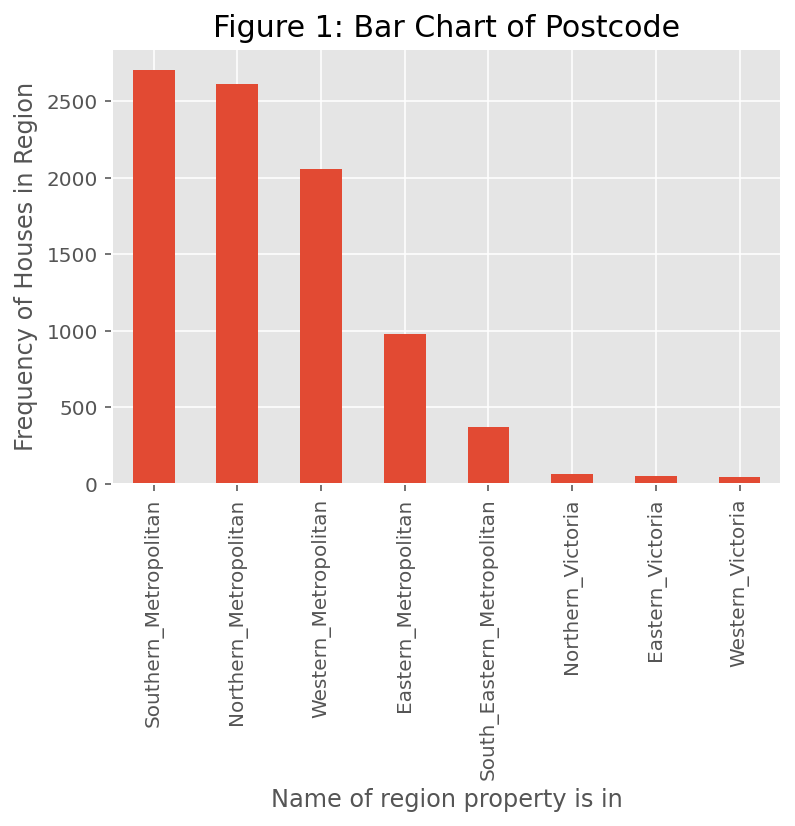

In [72]:
rgn=df['Regionname']
pc = rgn.value_counts().plot(kind = 'bar')
pc.set_xticklabels(pc.get_xticklabels(), rotation = 90)
plt.title('Figure 1: Bar Chart of Postcode', fontsize = 15)
plt.xlabel('Name of region property is in')
plt.ylabel('Frequency of Houses in Region')
plt.show();


Figure 2 and 3 represents Box plot of Distance and Barchart of Type of House respectively

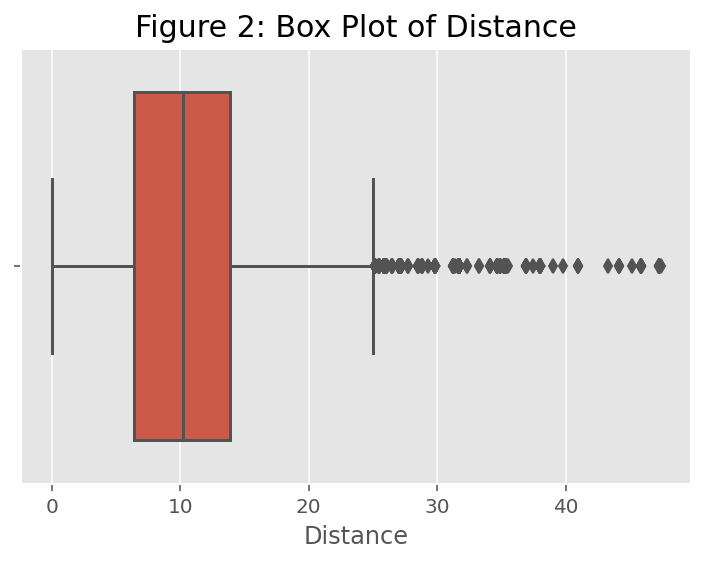

In [20]:
sns.boxplot(df['Distance']).set_title('Figure 2: Box Plot of Distance', fontsize = 15)
plt.show();

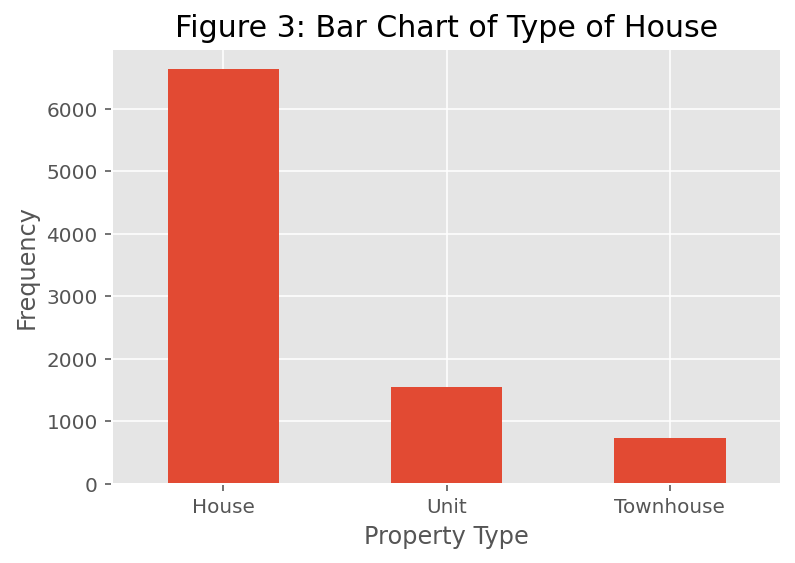

In [74]:
pc = df['Type'].value_counts().plot(kind = 'bar')
pc.set_xticklabels(pc.get_xticklabels(), rotation = 0)
plt.title('Figure 3: Bar Chart of Type of House', fontsize = 15)
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show();


### Multivariate Visualisation<a name =multi ></a>

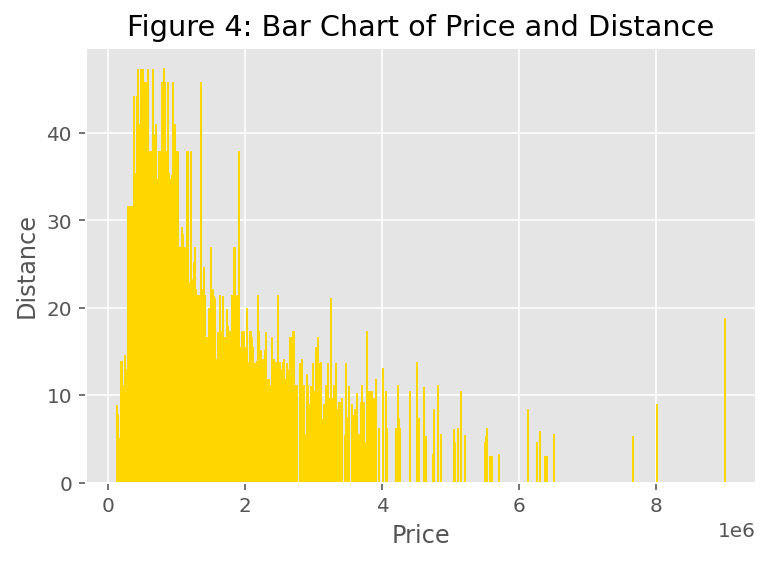

In [22]:
plt.bar(df['Price'],df['Distance'],width=15000,COLOR='gold')
plt.title("Figure 4: Bar Chart of Price and Distance")
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()

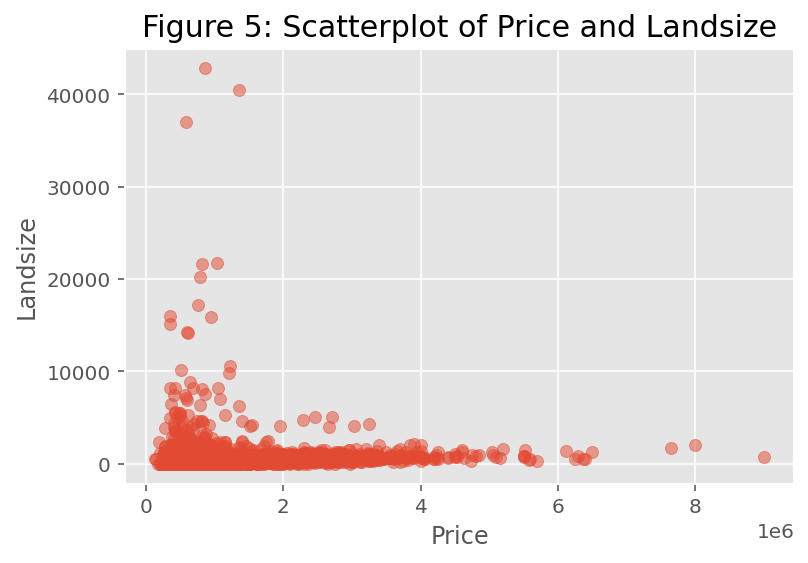

In [23]:
plt.scatter(df['Price'], df['Landsize'], alpha = 0.5)
plt.title('Figure 5: Scatterplot of Price and Landsize', fontsize = 15)
plt.ylabel('Landsize')
plt.xlabel('Price')
plt.show();


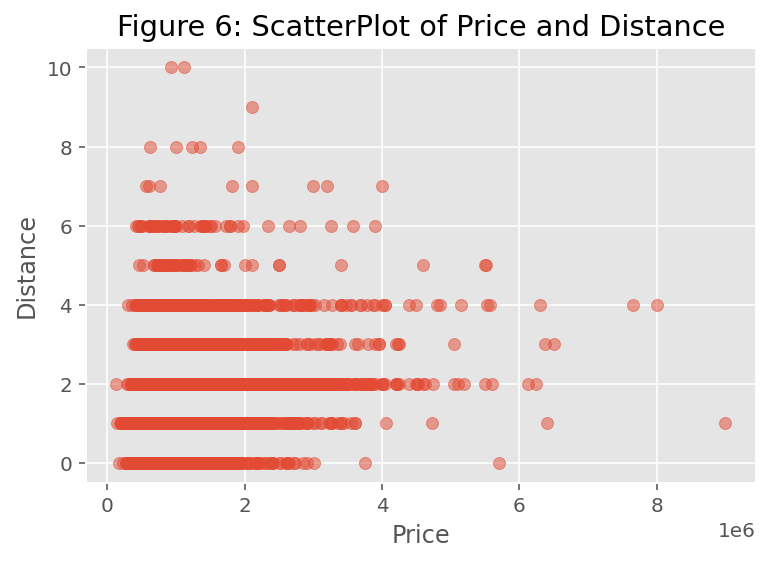

In [60]:
plt.scatter(df['Price'],df['Car'],alpha=0.5)
plt.title("Figure 6: ScatterPlot of Price and Distance")
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()

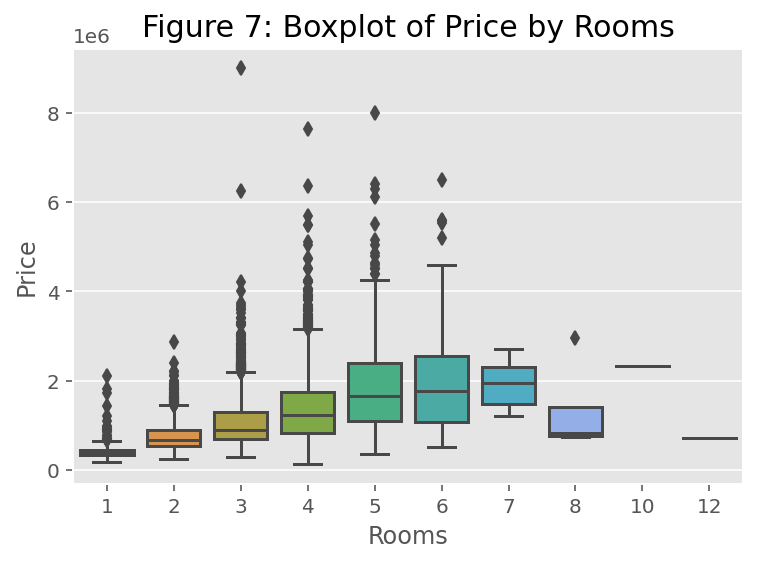

In [61]:
sns.boxplot(df['Rooms'], df['Price']);
plt.title('Figure 7: Boxplot of Price by Rooms', fontsize = 15)
plt.show();

## Statistical Modeling & Performance Evaluation<a name = model></a>

### Full Model<a name =full ></a>
We will begin by fitting a multiple linear regression that predicts `Price` using all of the available features from the dataset. 

We will first have a look at the clean data

In [26]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,Abbotsford,2,House,1035000,2.5,3067,1,0,156,79,1900,Yarra_City_Council,Northern_Metropolitan,4019
4,Abbotsford,3,House,1465000,2.5,3067,2,0,134,150,1900,Yarra_City_Council,Northern_Metropolitan,4019
6,Abbotsford,4,House,1600000,2.5,3067,1,2,120,142,2014,Yarra_City_Council,Northern_Metropolitan,4019
11,Abbotsford,3,House,1876000,2.5,3067,2,0,245,210,1910,Yarra_City_Council,Northern_Metropolitan,4019
14,Abbotsford,2,House,1636000,2.5,3067,1,2,256,107,1890,Yarra_City_Council,Northern_Metropolitan,4019


To be able to do automatic variable selection during the modelling, we will need perform "one-hot-encoding" of all the categorical features.

To prepare the dataset for one-hot-encoding, we must

In [27]:
encoded_data = pd.get_dummies(df, drop_first=True)
encoded_data.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Suburb_Aberfeldie,Suburb_Airport_West,Suburb_Albanvale,Suburb_Albert_Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona_Meadows,Suburb_Altona_North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot_Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale_Gardens,Suburb_Attwood,Suburb_Avondale_Heights,Suburb_Bacchus_Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn_North,Suburb_Bayswater,Suburb_Bayswater_North,Suburb_Beaconsfield,Suburb_Beaconsfield_Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh_East,Suburb_Berwick,...,Postcode_3977,CouncilArea_Bayside_City_Council,CouncilArea_Boroondara_City_Council,CouncilArea_Brimbank_City_Council,CouncilArea_Cardinia_Shire_Council,CouncilArea_Casey_City_Council,CouncilArea_Darebin_City_Council,CouncilArea_Frankston_City_Council,CouncilArea_Glen_Eira_City_Council,CouncilArea_Greater_Dandenong_City_Council,CouncilArea_Hobsons_Bay_City_Council,CouncilArea_Hume_City_Council,CouncilArea_Kingston_City_Council,CouncilArea_Knox_City_Council,CouncilArea_Macedon_Ranges_Shire_Council,CouncilArea_Manningham_City_Council,CouncilArea_Maribyrnong_City_Council,CouncilArea_Maroondah_City_Council,CouncilArea_Melbourne_City_Council,CouncilArea_Melton_City_Council,CouncilArea_Mitchell_Shire_Council,CouncilArea_Monash_City_Council,CouncilArea_Moonee_Valley_City_Council,CouncilArea_Moorabool_Shire_Council,CouncilArea_Moreland_City_Council,CouncilArea_Nillumbik_Shire_Council,CouncilArea_Port_Phillip_City_Council,CouncilArea_Stonnington_City_Council,CouncilArea_Whitehorse_City_Council,CouncilArea_Whittlesea_City_Council,CouncilArea_Wyndham_City_Council,CouncilArea_Yarra_City_Council,CouncilArea_Yarra_Ranges_Shire_Council,Regionname_Eastern_Victoria,Regionname_Northern_Metropolitan,Regionname_Northern_Victoria,Regionname_South_Eastern_Metropolitan,Regionname_Southern_Metropolitan,Regionname_Western_Metropolitan,Regionname_Western_Victoria
2,2,1035000,2.5,1,0,156,79,1900,4019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,1465000,2.5,2,0,134,150,1900,4019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,4,1600000,2.5,1,2,120,142,2014,4019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
11,3,1876000,2.5,2,0,245,210,1910,4019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
14,2,1636000,2.5,1,2,256,107,1890,4019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [28]:
indep_vars_formula_encoded = ' + '.join(encoded_data.drop(columns='Price').columns)
encoded_formula = 'Price ~ ' + indep_vars_formula_encoded
print('encoded_formula: ', encoded_formula)

encoded_formula:  Price ~ Rooms + Distance + Bathroom + Car + Landsize + BuildingArea + YearBuilt + Propertycount + Suburb_Aberfeldie + Suburb_Airport_West + Suburb_Albanvale + Suburb_Albert_Park + Suburb_Albion + Suburb_Alphington + Suburb_Altona + Suburb_Altona_Meadows + Suburb_Altona_North + Suburb_Ardeer + Suburb_Armadale + Suburb_Ascot_Vale + Suburb_Ashburton + Suburb_Ashwood + Suburb_Aspendale + Suburb_Aspendale_Gardens + Suburb_Attwood + Suburb_Avondale_Heights + Suburb_Bacchus_Marsh + Suburb_Balaclava + Suburb_Balwyn + Suburb_Balwyn_North + Suburb_Bayswater + Suburb_Bayswater_North + Suburb_Beaconsfield + Suburb_Beaconsfield_Upper + Suburb_Beaumaris + Suburb_Bellfield + Suburb_Bentleigh + Suburb_Bentleigh_East + Suburb_Berwick + Suburb_Black_Rock + Suburb_Blackburn + Suburb_Blackburn_North + Suburb_Blackburn_South + Suburb_Bonbeach + Suburb_Boronia + Suburb_Botanic_Ridge + Suburb_Box_Hill + Suburb_Braybrook + Suburb_Briar_Hill + Suburb_Brighton + Suburb_Brighton_East + Suburb_B

Now that we have defined the formula for the statistical model as a string, we will fit an OLS (ordinary least squares) model to our encoded data.

We will also need to increase the deafult system recursion level so that it is able to fit the whole formula into the OLS model, otherwise an error saying that `'maximum recursion depth exceeded'` will occur

In [29]:
sys.setrecursionlimit(1200)

full_model = sm.formula.ols(formula=encoded_formula, data=encoded_data)

full_model_fitted = full_model.fit()

print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     69.82
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        05:06:06   Log-Likelihood:            -1.2622e+05
No. Observations:                8887   AIC:                         2.531e+05
Df Residuals:                    8563   BIC:                         2.554e+05
Df Model:                         323                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

The full model has an adjusted R-squared value of 0.714, meaning that 71% is explained by the model.

By observing the p-values, we can see that quite a few of them are highly significant, with the majority of the p-values varying in significance levels, while also having a few insignificant p-values.

We will now create a new dataframe that contains actual price vs. predicted price and the residuals for the full model. We will also use this data frame to plot the predicted values and the regression residuals

In [30]:
full_residuals = pd.DataFrame({'actual' : encoded_data['Price'],
                            'predicted' : full_model_fitted.fittedvalues,
                             'residual' : full_model_fitted.resid})

full_residuals.head()

,actual,predicted,residual
2,1035000,1.085169e+06,-50169.311018
4,1465000,1.457341e+06,7659.342400
6,1600000,1.318373e+06,281627.011574
11,1876000,1.525138e+06,350862.158229
14,1636000,1.258158e+06,377842.425891


We cna now plot the graph of actual price vs predicted price

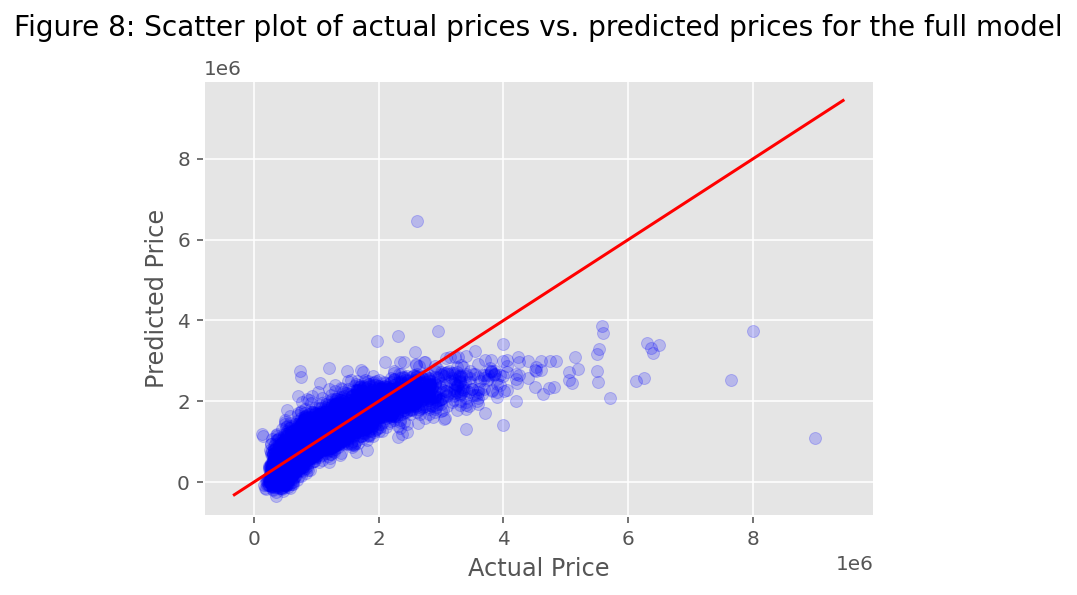

In [62]:
def plot_line(axis, slope, intercept, **kargs):
  xmin, xmax = axis.get_xlim()
  plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

plt.scatter(full_residuals['actual'], full_residuals['predicted'], c="blue", alpha=0.2);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 8: Scatter plot of actual prices vs. predicted prices for the full model\n', fontsize=14);
plt.show();

From Figure 6, we can see that the model is not 100% accurate as it does not predict a house price that is more than around around $\$$6.5 million, even though the most expensive house price is $\$$9 million. To try and rectify this we will have to perform diagnostics checks for the full model

### Full Model Diagnostic Checks<a name =full-check ></a>

We will now need to check if there are signs of violations of the regression assumptions, which are:

1. The true relationship between the target variables and linear variables are independent
2. Constant variance of the errors
3. The residual distribution is normally distributed
4. The observations are independent of each other

First we will plot a scatterplot of the residuals

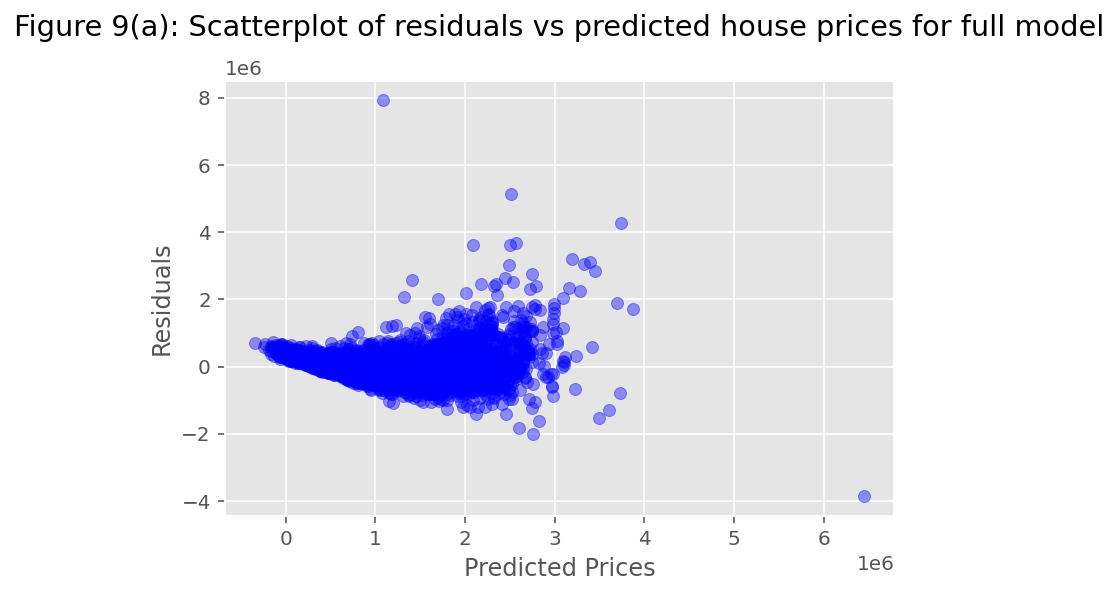

In [63]:
plt.scatter(full_residuals['predicted'], full_residuals['residual'], c='blue', alpha=0.4)
plt.xlabel('Predicted Prices');
plt.ylabel('Residuals')
plt.title('Figure 9(a): Scatterplot of residuals vs predicted house prices for full model\n')
plt.show();

As we can see from figure 9(a), although the residuals are slightly centred around 0, they are somewhat random towards to right-tail and possess a strong negative linear relationship at the start, which then becomes a weak positive relationship after around the predicted price of $\$$1 million. There are also many outliers when the predicted house price is above $2,000,000, which suggests that the linearity assumption of linear regression is not completely satisfied.

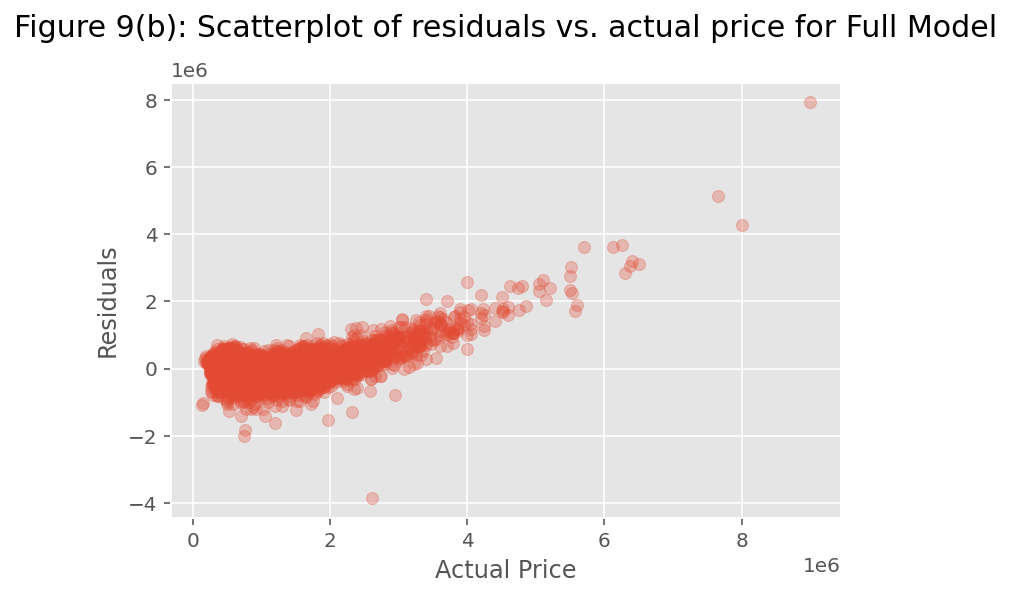

In [65]:
plt.scatter(full_residuals['actual'], full_residuals['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 9(b): Scatterplot of residuals vs. actual price for Full Model\n', fontsize=15)
plt.show();

We will now combine the histograms of actual vs. precited house price and overlay the two histograms ontop of each other

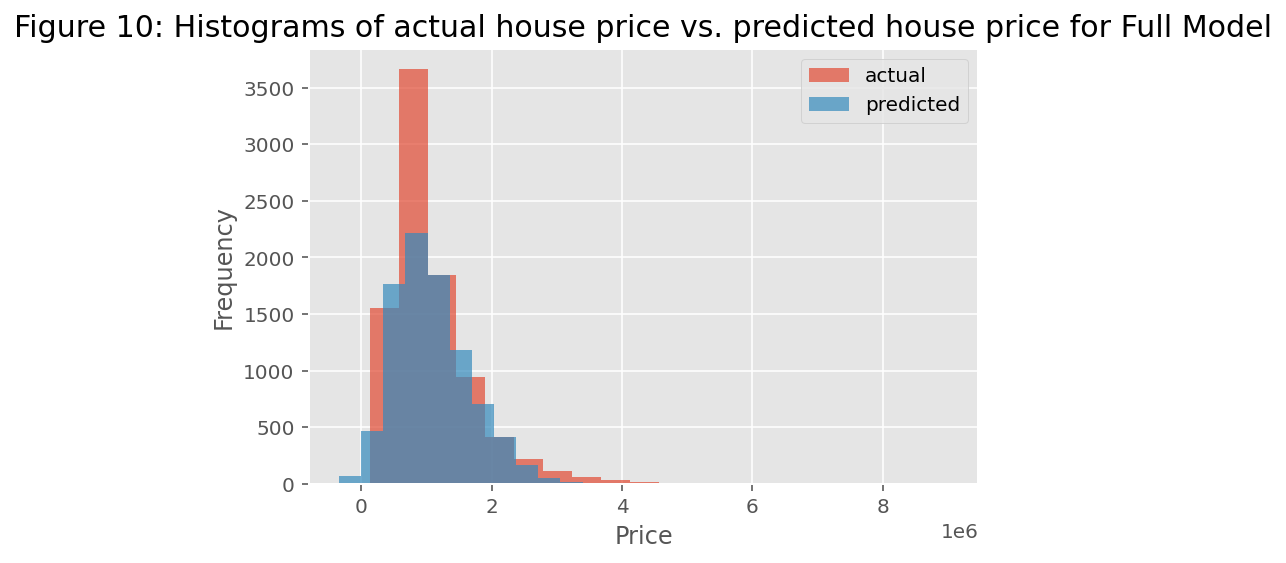

In [66]:
plt.hist(full_residuals['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(full_residuals['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 10: Histograms of actual house price vs. predicted house price for Full Model', fontsize=15);
plt.legend()
plt.show();

We can see that the two distributions have some similarities, however the predicted prices are not clustered around the $1.5 million mark, like what the actual prices are. We will now also observe the histogram of residuals

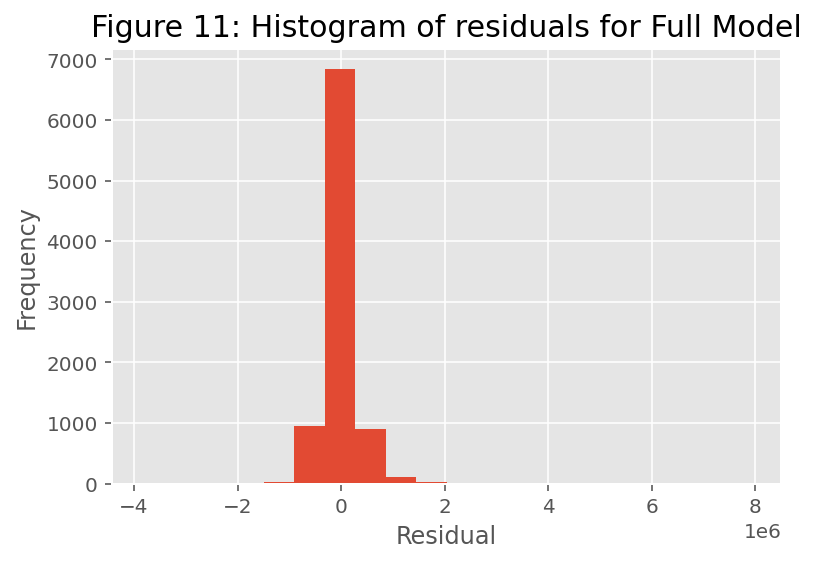

In [67]:
plt.hist(full_residuals['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 11: Histogram of residuals for Full Model', fontsize=15);
plt.show();

As we can see from figure 11, the histogram of residuals is symmetric, with it being slightly right-skewed. Because of this we can say that the normality assumption of linear regression has not been largely breached.

### Backwards Feature Selection<a name = back></a>

In [52]:
patsy_desc = patsy.ModelDesc.from_formula(encoded_formula)

linearReg_fit = full_model_fitted

p_value_cut = 0.05  

print('\nPerforming backwards feature selection using p-values:')

while True:
  pval_series = linearReg_fit.pvalues.drop(labels='Intercept')
  pval_series = pval_series.sort_values(ascending=False)
  term = pval_series.index[0]
  pval = pval_series[0]
  if (pval < p_value_cut):
        break
  term_comp = term.split(':')
  print(f'\nRemoving term "{term}" with p-value {pval:.4}')
  if(len(term_comp) == 1):
    patsy_desc.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_comp[0])]))
  else:
    patsy_desc.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_comp[0]), 
                                                        patsy.EvalFactor(term_comp[1])]))
    
  linearReg_fit = smf.ols(formula = patsy_desc, data = encoded_data).fit()

reduced_model_fitted = smf.ols(formula = patsy_desc, data = encoded_data).fit()

print("\n***")
print(reduced_model_fitted.summary())
print("***")
print(f"Regression number of terms: {len(reduced_model_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {reduced_model_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {reduced_model_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {reduced_model_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Postcode_3185" with p-value 0.9896

Removing term "Suburb_Dandenong" with p-value 0.9885

Removing term "Suburb_Ringwood" with p-value 0.9857

Removing term "Postcode_3011" with p-value 0.9785

Removing term "Suburb_South_Kingsville" with p-value 0.9735

Removing term "Suburb_West_Melbourne" with p-value 0.9726

Removing term "Postcode_3003" with p-value 0.9726

Removing term "Postcode_3130" with p-value 0.9687

Removing term "Suburb_Cranbourne_North" with p-value 0.9685

Removing term "Suburb_Essendon" with p-value 0.9709

Removing term "Suburb_Seabrook" with p-value 0.9657

Removing term "Suburb_Burnside" with p-value 0.9623

Removing term "Suburb_Heidelberg_Heights" with p-value 0.9617

Removing term "Suburb_Meadow_Heights" with p-value 0.9607

Removing term "Postcode_3049" with p-value 0.9645

Removing term "Suburb_Newport" with p-value 0.9557

Removing term "Suburb_Coolaroo" with p-value 0.9726

Removing term 

We will now create a new dataframe for the new reduced model for actual vs. predicted house prices as was done for the full model

In [54]:
reduced_residuals = pd.DataFrame({'actual' : encoded_data['Price'],
                               'predicted' : reduced_model_fitted.fittedvalues,
                                'residual' : reduced_model_fitted.resid})
reduced_residuals.head()

,actual,predicted,residual
2,1035000,1.127680e+06,-92680.484533
4,1465000,1.499769e+06,-34769.172653
6,1600000,1.338221e+06,261779.494178
11,1876000,1.566851e+06,309148.915867
14,1636000,1.298314e+06,337686.398081


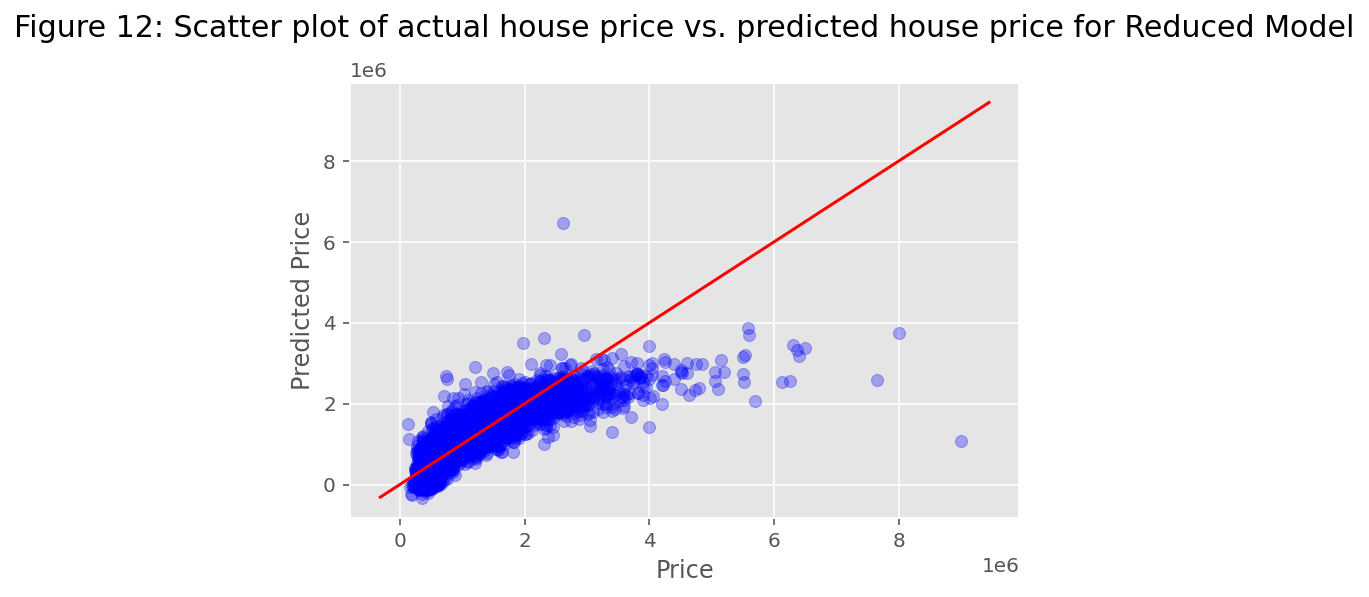

In [68]:
plt.scatter(reduced_residuals['actual'], reduced_residuals['predicted'], c='blue', alpha=0.3)
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 12: Scatter plot of actual house price vs. predicted house price for Reduced Model\n', fontsize=15);
plt.show(); 


The new reduced model returns an Adjusted R-Squared value of 0.716, meaning that the reduced model still explains about 71% of the variance, but with 219 less features. In regards to the p-value, they are all significant at around the 5% level, which was to be expected. From the new scatter plot of the reduced model in Figure 12, we are still having the same problem as before whereby the model does not predict a price over $\$$6.5 million, even though the most expensive property in the dataset is at $\$$9 million. We will again perform diagnostic checks on the reduced model

### Reduced Model Diagnostic Checks<a name = red></a>

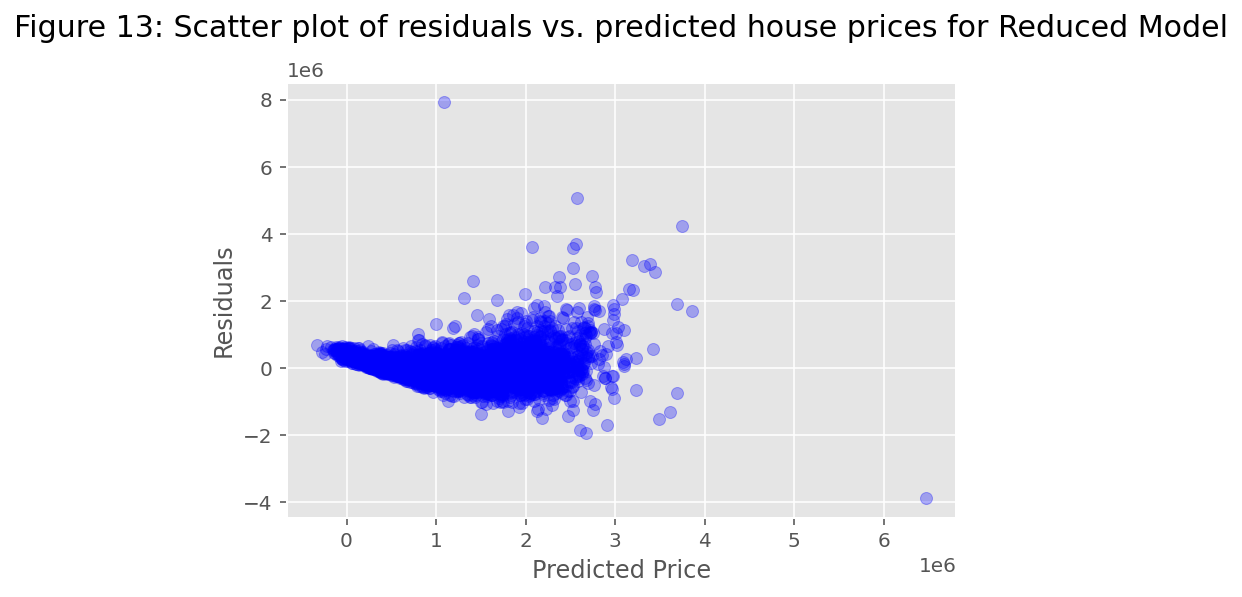

In [69]:
plt.scatter(reduced_residuals['predicted'], reduced_residuals['residual'], c='blue', alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 13: Scatter plot of residuals vs. predicted house prices for Reduced Model\n', fontsize=15)
plt.show();

Figure 13 looks very similar to Figure 9(a), showing that the residuals follow the same sort of pattern and the outliers that are produced are similar. We will now explore the residuals for the reduced model on a histogram.

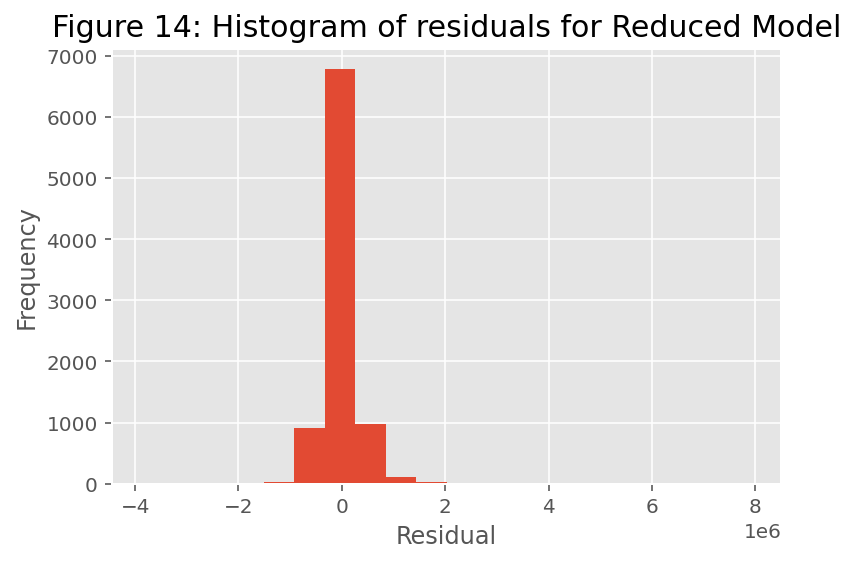

In [70]:
plt.hist(reduced_residuals['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 14: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Figure 14 is almost identical to Figure 11, showing a symmetric histogram around zero, with it being slightly right-skewed. This as a result suggests that the reduced model is mostly normally distributed

## Summary and Conclusions<a name = con></a>

Using the independent features, we were able to get the full model to an Adjusted R-squared value of around 71%. After completing backwards variable selection while having a p-cutoff value of 0.05, we maintained the same performance level while reducing the number of variables in the model by 219. The final model, being reduced, has a total of 105 features with a model p-value of 0. Diagnostic checks on the residual scatter plots suggest that although the residuals are slightly centred around 0, they are somewhat random towards to right-tail random and possess a strong negative linear relationship at the start, which then becomes a weak positive relationship after around the $1 million predicted price mark. This is all while also keeping in mind that the residual histogram shows no significant violation of the normality assumption on the residuals. 

The final linear regression model, as mentioned previously, has an Adjusted R-squared value of around 71%. This is a decently high value as it shows that the model can cover for around 71% of the variance. This also shows us that the features that we have used in the are adequate, however, there is most certainly room for improvement as we have not fully covered 100% of the variance. Although hard to achieve, this is most certainly a target worth trying to meet.

The regression model we have produced seems to correctly predict the price of a house within around $\pm\$1,000,000$ in general. However this is obviously a very large margin of error for the model to be able to be of use and purposeful.

Furthermore, the model also has another large underlying issue, being that it does not predict a price over $\$6.5$ million

## References<a name =ref ></a>

*Pino, T.* (2018). *Melbourne Housing Market*. Retrieved 22 October 2020, from https://www.kaggle.com/anthonypino/melbourne-housing-market

*Regression Case Study.* (2020). Retrieved 1 November 2020, from https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/